# Lead scoring Model -  by shaiz

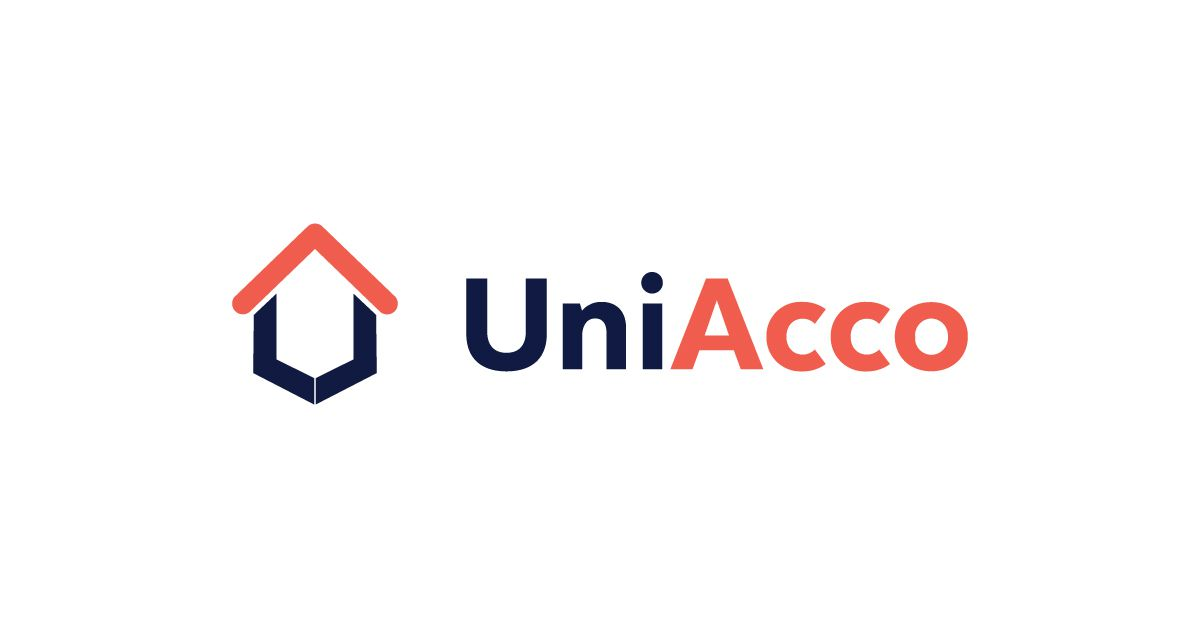

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msn

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings

In [2]:
warnings.filterwarnings('ignore')

### Importing Data

In [3]:
url = 'https://docs.google.com/spreadsheets/d/1rK1CLqpsd6JfSBLk9nRE-f0NzDc9lEXgxZ-cKjxIN_s/export?format=xlsx'
data = pd.read_excel(url)

### Cleaning and Wrangling Data

In [4]:
data.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [5]:
# Replacing the unknown data as nan 
df = data.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)

In [6]:
# dropping the index columns
df = df.iloc[: , 1:]

In [7]:
df.shape

(46608, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        46608 non-null  object        
 1   status          46608 non-null  object        
 2   lost_reason     43244 non-null  object        
 3   budget          42908 non-null  object        
 4   lease           44267 non-null  object        
 5   movein          32970 non-null  datetime64[ns]
 6   source          40631 non-null  object        
 7   source_city     37757 non-null  object        
 8   source_country  37967 non-null  object        
 9   utm_source      46547 non-null  object        
 10  utm_medium      43421 non-null  object        
 11  des_city        44071 non-null  object        
 12  des_country     44071 non-null  object        
 13  room_type       23061 non-null  object        
 14  lead_id         46608 non-null  object        
dtypes:

<AxesSubplot:>

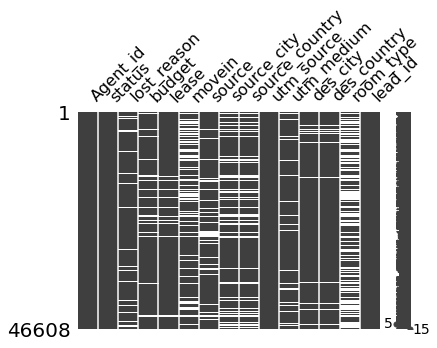

In [9]:
# Visualizing the null
msn.matrix(df,figsize=(6,4))

In [10]:
# removing the unwanted data
remove = ['OPPORTUNITY', 'CONTACTED', 'PROCESSING','IMPORTANT']
df = df[df.status.isin(remove) == False]

In [11]:
df['status'].unique()

array(['LOST', 'WON'], dtype=object)

In [12]:
df['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

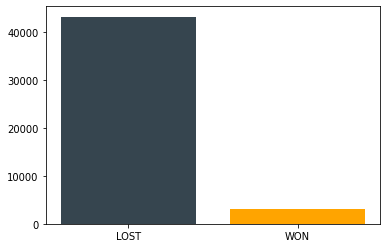

In [13]:
# Visualizing the imbalance in data
counts = df['status'].value_counts()
colors = ['#36454F','#FFA400']
plt.bar(counts.index,counts,color=colors)
plt.show()

In [14]:
df['room_type'].unique()

array([nan, 'Ensuite', 'Entire Place', 'Studio', 'Twin-Studio',
       'Non-Ensuite'], dtype=object)

In [15]:
# Looking for data with status as 'LOST' but having null value
df.loc[(df['status'] == 'LOST') & (df.isnull().sum(axis=1) > 0)]

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120.0,semester-stay,NaT,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46600,ecd8409a7716ba7f20b5ed1c68de689a94636675972d07...,LOST,Not a student,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,4fa64bd55d5c0c1f83015952b4b9500cb099dd0b1b0464...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,NaN,NaN,NaN,8d36e6b914a01125afd5baf86a9528ef31f2ba7812b1fa...
46601,5a39335b3529acae692acc9954d3b3d71f69e84963c9fb...,LOST,Low availability,1529.0,84.0,2022-08-30,fce2de0ca752918e030db0b31521693134ecfbf1c32e14...,130efea232d37b2351e9ed98bdb1ec482bb7e2e4af853d...,c5ef963994081d53520c520b85ca3cafbcd51eaa87c980...,d15690f08a575024650b01ffac892cfd2b93e6c57c140f...,NaN,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,201119c5a66fbf4782c071175d91766414509e7e06430a...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,2022-09-01,NaN,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,2022-09-29,NaN,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69

In [16]:
# Looking for data with status as 'WON' but having null value
df.loc[(df['status'] == 'WON') & (df.isnull().sum(axis=1) > 0)]

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
98,c077ad291c7b691b8defba867c1b937f16e878c1f3bdd5...,WON,NaN,109.0,51.0,NaT,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,acb208d3ac02ab6d5a45120b4187f12bc41a132011fe1c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b66690fb86da687dda8d0e4be51958aab94e4b595272d7...
111,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-09-09,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,71b89d8b802ddcc0120ec5352d9c0fe5bde35a3aff101b...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,eab489be32de234eb13f3ef643755451a2c2d876dadae9...
139,59e1dc79a681665177701a504d7d704e1b6e36a4e191f4...,WON,NaN,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,2022-09-29,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,acb208d3ac02ab6d5a45120b4187f12bc41a132011fe1c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,adbc799bdd9422ca4083ef3d83389853f1d72280efe25f...
141,96ab6152cb421b4d4012a4903c19004608a342a5f7c667...,WON,NaN,> 300£ Per Week,Complete Education Year Stay 50 - 52 weeks,2022-09-07,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,aff03877c7a6e8799057e5ad4b82de902487b7c7f30dbf...
152,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,69f0114003f8a8ec5f99506325f8ca6a5ca237c9fe91ba...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,1c4cb4a47a62cce90db6619f8ddeed9eb2c0a598a6d0ed...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46559,4ab75b931e46eda84e381be209b305d1ad8833f230eb24...,WON,NaN,139.0,42.0,2022-10-01,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,f618d9049cbfb9410ad8d47541218cc7a2a9e930750f59...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,69f81619d0ef92cbb165a44e76f4f0c284d2aa83c318fa...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,c4f2571fb68158cf43193eaaae6241d94652abae4ff953...
46566,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,WON,NaN,179.0,51.0,2022-09-10,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,ac15eb6ea0471bd80c833fa9d4ff9799de32a00b4681b0...,735b17b54154132f4d5c48eebcabe058b0e5a2953932ad...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,69f81619d0ef92cbb165a44e76f4f0c284d2aa83c318fa...,c384826dfbfce62c3fd99a46984a56fe71546a85c2cb6c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,f2a5171da297accb58cb0d1ad4480127032153e3437164...
46570,96ab6152cb421b4d4012a4903c19004608a342a5f7c667...,WON,NaN,180.0,44.0,2022-09-16,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,ecc0e7dc084f141b29479058967d0bc07

In [17]:
# Creating seperate dataframe for "WON" & "LOST"
df_lost = df[df['status']=='LOST']
df_won = df[df['status']=='WON']

In [18]:
# Checking for any null values in lost_reason
print("Total number of null in lost reason columns when status is Lost: ",df_lost['lost_reason'].isna().sum())
print("Total number of null in lost reason columns when status is Won: ",df_won['lost_reason'].isna().sum())

# Obviously, rows are empty for lost resons when status is won

Total number of null in lost reason columns when status is Lost:  0
Total number of null in lost reason columns when status is Won:  3073


In [19]:
'''Dropping lost_reason column as this piece of data cannot 
be obtained unless the lead is certainly lost.
'''
df.drop(columns = ['lost_reason'],inplace = True)

In [20]:
# Updating df's
df_lost = df[df['status']=='LOST']
df_won = df[df['status']=='WON']

In [21]:
# Using groupby to understand the category distribution
df.groupby('utm_source')['room_type'].value_counts().sort_values()

utm_source                                                        room_type   
7d71fa7a6bd0b0f416e818068a0aceaddc9914df674afae5ebd7dcdf63e73e90  Studio              1
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3  Twin-Studio         1
4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221694b2a96f9ecd8d717  Ensuite             1
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158  Studio              1
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490  Ensuite             1
5b8eeb90771c2031be0b865d6688c14f7d9dcf7468d8d8d43609cec71358bee9  Studio              1
7d71fa7a6bd0b0f416e818068a0aceaddc9914df674afae5ebd7dcdf63e73e90  Ensuite             1
ce43ccb66a63d70dd24b992aedbea52eee4229a1f21ff5ed31592f33ca411101  Entire Place        2
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3  Non-Ensuite         2
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158  Entire Place        2
ce43ccb66a63d70dd24b992aedbea52eee4229a1f

### Filling Null with the mode of each category

In [22]:
#  Dropping null in budget columns as there are just few null values
df = df.dropna(subset = ['budget'])

In [23]:
# Filling null values in room_type based on budget column 
mode_dict = df.groupby('budget')['room_type'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['room_type'] = df.apply(lambda x: mode_dict[x['budget']] if pd.isnull(x['room_type']) else x['room_type'], axis=1)

In [24]:
# Droping a row if all column values are empty
print("Shape before dropping null row: ",df_won.shape,df_lost.shape)
df_won.dropna(how='all', inplace=True)
df_lost.dropna(how='all', inplace=True)
print("Shape After dropping null row: ",df_won.shape,df_lost.shape)

# None dropped

Shape before dropping null row:  (3073, 14) (43244, 14)
Shape After dropping null row:  (3073, 14) (43244, 14)


In [25]:
#  Dropping null in utm_source columns as there are just few null values
df = df.dropna(subset = ['utm_source'])

In [26]:
# Filling the remaining null values in room_type based on utm_source column 
mode_dict = df.groupby('utm_source')['room_type'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['room_type'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['room_type']) else x['room_type'], axis=1)

In [27]:
mode_dict = df.groupby('utm_source')['movein'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['movein'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['movein']) else x['movein'], axis=1)

mode_dict = df.groupby('utm_source')['source_city'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['source_city'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['source_city']) else x['source_city'], axis=1)

mode_dict = df.groupby('utm_source')['source_city'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['source_city'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['source_city']) else x['source_city'], axis=1)

mode_dict = df.groupby('utm_source')['source_country'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['source_country'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['source_country']) else x['source_country'], axis=1)

mode_dict = df.groupby('utm_source')['source'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['source'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['source']) else x['source'], axis=1)

mode_dict = df.groupby('utm_source')['utm_medium'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['utm_medium'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['utm_medium']) else x['utm_medium'], axis=1)

mode_dict = df.groupby('utm_source')['des_city'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['des_city'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['des_city']) else x['des_city'], axis=1)

mode_dict = df.groupby('utm_source')['des_country'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['des_country'] = df.apply(lambda x: mode_dict[x['utm_source']] if pd.isnull(x['des_country']) else x['des_country'], axis=1)

mode_dict = df.groupby('budget')['lease'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['lease'] = df.apply(lambda x: mode_dict[x['budget']] if pd.isnull(x['lease']) else x['lease'], axis=1)

mode_dict = df.groupby('budget')['source_city'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['source_city'] = df.apply(lambda x: mode_dict[x['budget']] if pd.isnull(x['source_city']) else x['source_city'], axis=1)

mode_dict = df.groupby('budget')['source_country'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['source_country'] = df.apply(lambda x: mode_dict[x['budget']] if pd.isnull(x['source_country']) else x['source_country'], axis=1)

mode_dict = df.groupby('budget')['utm_medium'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['utm_medium'] = df.apply(lambda x: mode_dict[x['budget']] if pd.isnull(x['utm_medium']) else x['utm_medium'], axis=1)

In [28]:
# Dropping the remaining Null rows
df.dropna(inplace=True)

In [29]:
# Checking for null
df.isnull().sum()

Agent_id          0
status            0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
room_type         0
lead_id           0
dtype: int64

<AxesSubplot:>

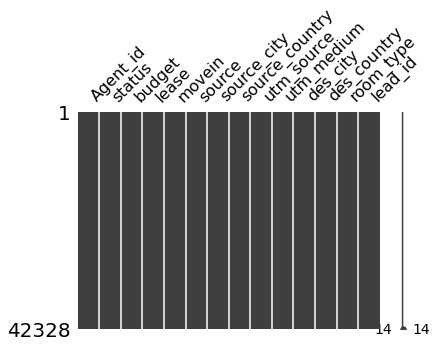

In [30]:
# Visualizing the null
msn.matrix(df,figsize=(6,4))

In [31]:
# Label encoding data
df_enco = df
encode = LabelEncoder()

original = df_enco
mask = df_enco.isnull()

df_enco = df_enco.astype(str).apply(LabelEncoder().fit_transform)
df_enco.where(~mask, original)

,Agent_id,status,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
2,84,0,1725,260,124,214,2616,165,17,3,17,8,0,17044
3,107,0,10,2,124,327,2814,165,17,3,25,8,0,3411
5,14,0,833,299,124,217,2100,100,17,3,205,8,0,20202
6,14,0,10,2,134,271,1033,165,7,3,200,8,0,14279
7,26,0,1761,203,132,214,2270,165,17,3,115,8,1,17044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,14,0,1796,257,125,214,2122,100,17,3,21,8,3,3142
46604,23,0,1796,279,153,214,2692,100,17,3,132,8,3,3708
46605,5,0,1775,260,144,214,2122,100,17,3,200,8,3,24671
46606,58,0,801,91,123,374,3938,133,13,44,200,8,0,3708


In [32]:
# Updating the df's
df_lost = df_enco[df_enco['status']==0]
df_won = df_enco[df_enco['status']==1]

In [33]:
# Callulating the ratio on imbalance
df_won.shape[0]/df_lost.shape[0]*100

7.554313301994664

### Oversampling and Undersampling

In [34]:
# Balancing
majority = df_lost
minority = df_won

majority_downsampled = resample(majority, replace=False, n_samples=len(majority['status'])//2)
minority_upsampled = resample(minority, replace=True, n_samples=19677)

balanced_data = pd.concat([majority_downsampled, minority_upsampled])
print(balanced_data['status'].value_counts())

0    19677
1    19677
Name: status, dtype: int64


### Model Building

In [35]:
x = balanced_data

<AxesSubplot:>

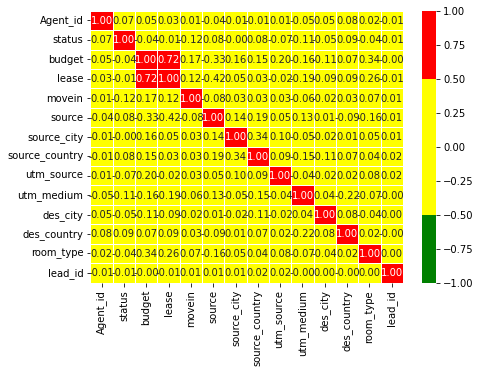

In [36]:
# Checkig for featue correlation
corr_matrix=x.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.7,
           fmt=".2f",vmin=-1,vmax=1,
           cmap=['green','yellow','yellow','red'])

In [37]:
'''Splitting the data in input and output and dropping the 
lease column as it has high correlation with "Budget"'''

x = balanced_data.drop(columns = ['status','lease'])
y = balanced_data['status']

In [38]:
# Splitting the data in train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
# Standardizing the data 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
# Finding the best algorithm for prediction
models={"KNN":KNeighborsClassifier(),
       "Logistic Regression" : LogisticRegression(),
       "Random Forest": RandomForestClassifier()}

def fit_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name]=model.score(x_test, y_test)
    return model_scores

model_scores = fit_score(models= models,
                        x_train = x_train,
                        x_test = x_test,
                        y_train = y_train,
                        y_test = y_test)
model_scores

{'KNN': 0.8148901029094143,
 'Logistic Regression': 0.5840426883496379,
 'Random Forest': 0.9739550247744886}

In [41]:
# Choosig KNN to avoid overfitting
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

### Results 

In [42]:
# Predict results for 2 samples

y_pred1 = model.predict([x_test[5]])

y_pred2 = model.predict([[-0.98919053, -0.66015672, -0.07784004,  0.40124682, -0.91927937,
        0.72206934,  0.31335267, -0.35064133, -1.37186585,  0.08522935,
       -0.54631839,  0.81708538]])

print(y_pred1,y_pred2)

[1] [1]


In [43]:
proba = model.predict_proba(x_test)
prediction = proba[:, 1] * 100
y_preds = model.predict(x_test)

### Evaluating the Performance using Metrics

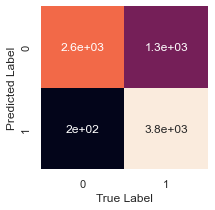

In [44]:
sns.set(font_scale=1)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot = True,
                  cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78      3910
           1       0.75      0.95      0.84      3961

    accuracy                           0.81      7871
   macro avg       0.84      0.81      0.81      7871
weighted avg       0.84      0.81      0.81      7871



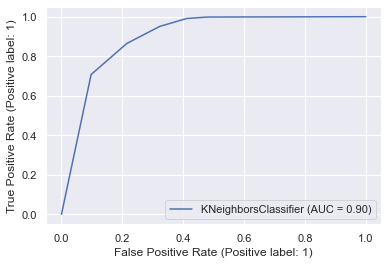

In [46]:
plot_roc_curve(model, x_test, y_test)

### EXTRA

In [47]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
# Print the feature importances in descending order 
feature_importances = model2.feature_importances_
indices = feature_importances.argsort()[::-1]
for i in indices:
    print(f"{x.columns[i]}: {feature_importances[i]}")
print('-'*10)    
print('This information can be used for feature selection and optimization of the model.')
    


Agent_id: 0.1839800651385243
lead_id: 0.1515723628381409
des_city: 0.14045127051730547
source_city: 0.12190343881643177
movein: 0.12161226086446426
budget: 0.09011927355651946
source_country: 0.059265203358770426
source: 0.05086336348268665
utm_source: 0.03307140788995281
room_type: 0.02206732492598608
utm_medium: 0.020104059062565814
des_country: 0.004989969548652034
----------
This information can be used for feature selection and optimization of the model


In [52]:
i = int(input('Enter index number between 0 to 7870 to predict its lead score ')) 
print(f"Lead score result for index no {i} in x_test is : ", model.predict_proba([x_test[i]])[0][1]*100)

Enter index number between 0 to 7870 to predict its lead score 56
Lead score result for index no 56 in x_test is :  100.0
